# PHYS 512 PS2 Q2


In [1]:
import numpy as np
import spinmob as sm
import matplotlib.pyplot as plt

start off looking at the data

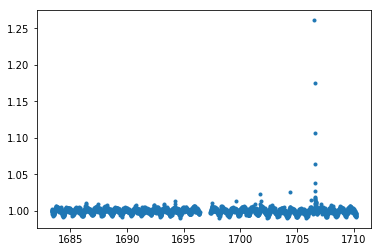

In [4]:
d = np.loadtxt('229614158_PDCSAP_SC6.txt', delimiter=',',unpack = True)
t = d[0]
flx = d[1]
plt.plot(t,flx,".")

Here I am trying to find a suitable range of t values that we will fit 

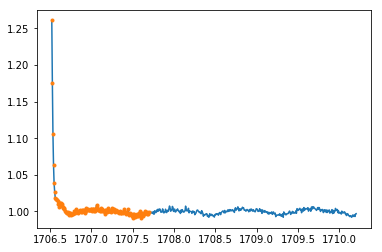

In [73]:
i = np.where(flx>1.05)
i_fmax = i [0][0]
t_trim1 = t[i_fmax:]
flx_trim1 = flx[i_fmax:]
plt.plot(t_trim1,flx_trim1)


i = np.where(t>1707.7)
i_t_end = i[0][0]

t_trim2 = t[i_fmax:i_t_end]
#set start of decay to t = 0
#t_trim = t_trim -t_trim[0]
flx_trim2 = flx[i_fmax:i_t_end]
plt.plot(t_trim2,flx_trim2,'.')


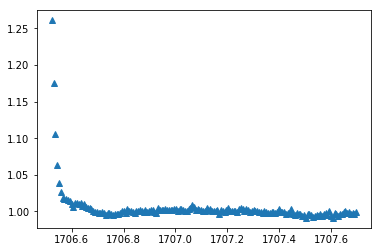

In [74]:
plt.plot(t_trim2,flx_trim2,'^')

set the top of the peak to t=0 for easier calculations

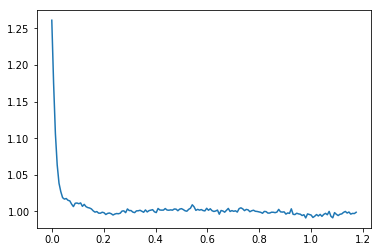

In [75]:
t_shift =  t_trim2 - t_trim2[0]
flx_shift = flx_trim2
plt.plot(t_shift,flx_shift)

this will take array of t values and return the flux values with model paramters p. 
$flux = ae^\frac{-t}{T} +c$ 

In [76]:
def calc_guess(t,p):
    a = p[0]
    T = p[1]
    c = p[2]
    g = a*np.exp(-1*t/T) + c
    return g

My guess seems pretty good though T could be a little smaller

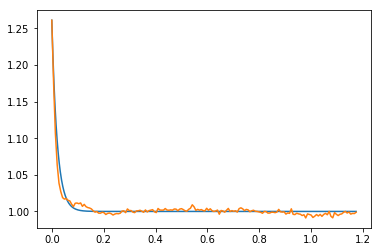

In [77]:
#my guess
c =1 
a = flx_shift[0] - c
i_tT = np.where(flx_trim<(a/np.e +c))
T = t_shift[i_tT[0][0]]
p_guess = [a,T,c]
t_guess = np.linspace(0,t_shift[-1],2000)
plt.plot(t_guess,calc_guess(t_guess,p_guess))
plt.plot(t_shift,flx_shift)

calculates gradiant and function evlaluated at t values in t array

In [78]:
def getGrad_etc(para,t):
    grad = np.zeros([len(t),len(para)])
    a = para[0]
    T = para[1]
    c = para[2]
    grad[:,0] =np.exp(-t/T)
    f = a*grad[:,0] +c
    grad[:,1] = f/T**2
    grad[:,2] = 1
    return grad,f

0
[0.26101314 0.02083333 1.        ]
1
[0.30422603 0.02083524 0.99609375]
0.2809673213198042
0.11417077127199426
[0.26101314 0.02083333 1.        ] 0.11417077127199426
[[-4.09480075e+09  6.80907204e+06 -1.56881020e+10]
 [ 6.80907204e+06 -1.13225196e+04  2.60870853e+07]
 [-1.56881020e+10  2.60870853e+07 -6.01046445e+10]]


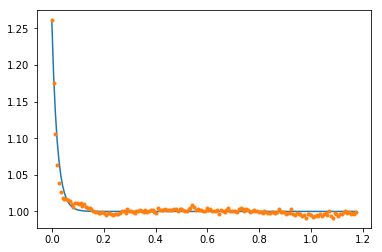

In [198]:


def least_sqr_fit(t,flx,p_guess,ey=1):
    para=np.array(p_guess)
    for n in range(5):
        print(n)
        print(para)
        grad,fit=getGrad_etc(para,t)
        resid=flx-fit
        chi_sqr=(1/ey)*np.sum(resid**2)
        if n!=0:
            print(chi_sqr)
            print(chi_sqr_old)
            if chi_sqr+0.01>(chi_sqr_old):
                para = para_old
                chi_sqr = chi_sqr_old
                break
        gTg=np.transpose(grad)@grad
        gTr=np.transpose(grad)@resid
        coVar = np.linalg.inv(gTg)
        dp=coVar@(gTr)
        chi_sqr_old = chi_sqr
        para_old = para
        para = para + 0.5*dp
    print(para,chi_sqr)  
    print(chi_sqr*coVar/(len(t)-len(p_guess)))
    return para,chi_sqr
p_fit,fit_chi2 = least_sqr_fit(t_shift,flx_shift,p_guess,ey=0.05)
plt.plot(t_shift,calc_guess(t_shift,p_fit),)
plt.plot(t_shift,flx_shift,".")

I tried with a small set of points. I this case had I coded the fitter properly I would have a little more confidence in the results since the the systematic error from the underlaying pattern in the data is so small compared to the data points but getting a decent estimate on the error is difficult. 

0
[0.28711445 0.02083333 1.        ]
1
[0.27930195 0.02084096 0.9765625 ]
0.0626217644818574
0.7592368274065694
2
[0.28711445 0.02083953 0.97460938]
0.07241272788027049
0.0626217644818574
[0.27930195 0.02084096 0.9765625 ] 0.0626217644818574
[[ 6.23483783e+11 -9.69586906e+08  2.17997359e+12]
 [-9.69586906e+08  1.50781591e+06 -3.39010236e+09]
 [ 2.17997359e+12 -3.39010236e+09  7.62214667e+12]]


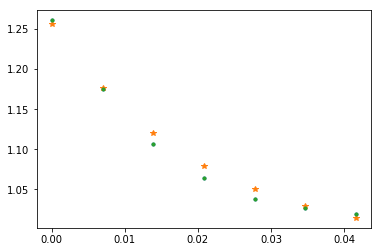

In [199]:
t_small = t_shift[0:7]
flx_small = flx_shift[0:7]
plt.plot(t_small,flx_small,'.')
#plt.plot(t_shift,flx_shift)
p_fit,fit_chi2 = least_sqr_fit(t_small,flx_small,[1.1*p_guess[0],p_guess[1],p_guess[2]],ey=0.01)
plt.plot(t_small,calc_guess(t_small,p_fit),'*')
plt.plot(t_small,flx_small,".")

0
[0.26101314 0.02083333 1.        ]
1
[0.27077876 0.02083333 0.9921875 ]
0.2533809459507705
0.3643453830931928
2
[0.25124751 0.02082952 1.        ]
0.2875407088066269
0.2533809459507705
[0.27077876 0.02083333 0.9921875 ] 0.2533809459507705
[[ 5.06795723e+12 -8.12336306e+09  1.85700080e+13]
 [-8.12336306e+09  1.30208335e+07 -2.97656254e+10]
 [ 1.85700080e+13 -2.97656254e+10  6.80442197e+13]]


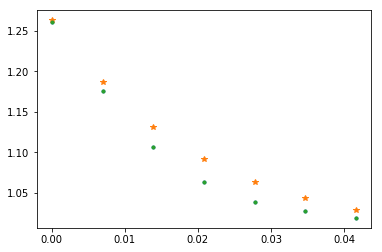

In [200]:
t_small = t_shift[0:7]
flx_small = flx_shift[0:7]
plt.plot(t_small,flx_small,'.')
#plt.plot(t_shift,flx_shift)
p_fit,fit_chi2 = least_sqr_fit(t_small,flx_small,[p_guess[0],p_guess[1],p_guess[2]],ey=0.01)
plt.plot(t_small,calc_guess(t_small,p_fit),'*')
plt.plot(t_small,flx_small,".")

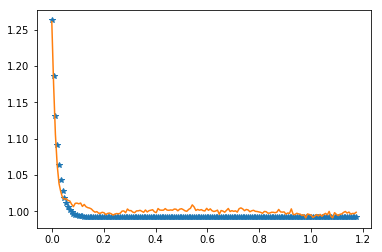

In [201]:
plt.plot(t_shift,calc_guess(t_shift,p_fit),'*')
plt.plot(t_shift,flx_shift)